Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?
--
---
polynomial functions and polynomial kernels share a relationship in the context of SVMs. Polynomial kernels use polynomial transformations to implicitly map data into higher-dimensional spaces, allowing them to capture non-linear relationships, much like the explicit use of polynomial functions in feature engineering for non-linear regression. However, kernel functions extend beyond just polynomial transformations and can include other types of transformations, like RBF and sigmoid kernels.

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?
--
----
1.Import the necessary libraries:

In [1]:
from sklearn.svm import SVC

2.Create an SVM classifier with a polynomial kernel. You can specify the kernel type and other hyperparameters:

In [2]:
# Create an SVM classifier with a polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3, C=1.0)

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?
--
---
In Support Vector Regression (SVR), the value of epsilon defines the width of the tube within which no penalty is given to errors. This means that data points that lie within this tube, or margin, are considered support vectors and do not contribute to the error. 

Therefore, increasing the value of epsilon would increase the width of this tube, allowing more data points to be included within it. This could potentially decrease the number of support vectors, as fewer data points would lay outside of the tube and be subject to penalty. However, the exact impact on the number of support vectors can depend on the specific distribution and characteristics of your data.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?
--
---
1. **Kernel Function**: The kernel function is used to map the input vectors into a higher-dimensional feature space to realize the non-linear algorithm for original space. This allows SVR to capture more complex relationships between the input variables and the target variable. The choice of kernel function depends on the data's characteristics and the task's complexity. For example, a linear kernel is a simple dot product between two input vectors, while a non-linear kernel like the Radial Basis Function (RBF) can capture more intricate patterns in the data.

2. **C Parameter**: The C parameter in SVR controls the trade-off between training error and margin width. It controls the penalty for misclassified points during training, affecting the generalization performance and the potential for overfitting or underfitting. A larger value of C means that the model will try to minimize the insensitive loss more, while a smaller value of C means that the model will be more lenient in allowing larger errors.

3. **Epsilon Parameter**: In SVR, epsilon defines the width of the tube within which no penalty is given to errors. This means that data points that lie within this tube are considered support vectors and do not contribute to the error. Therefore, increasing epsilon would increase the width of this tube, potentially decreasing the number of support vectors as fewer data points would lay outside of it.

4. **Gamma Parameter**: The gamma parameter in SVR defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. If gamma is too large, the radius of influence of any selected support vector would only include the support vector itself, leading to overfitting. Conversely, if gamma is too small, the model is too constrained and cannot capture the complexity or "shape" of the data.

In practice, tuning these parameters requires careful consideration and experimentation. It's often helpful to use techniques like cross-validation and grid search to systematically explore different combinations of parameter values and identify which ones yield the best performance on your specific dataset.



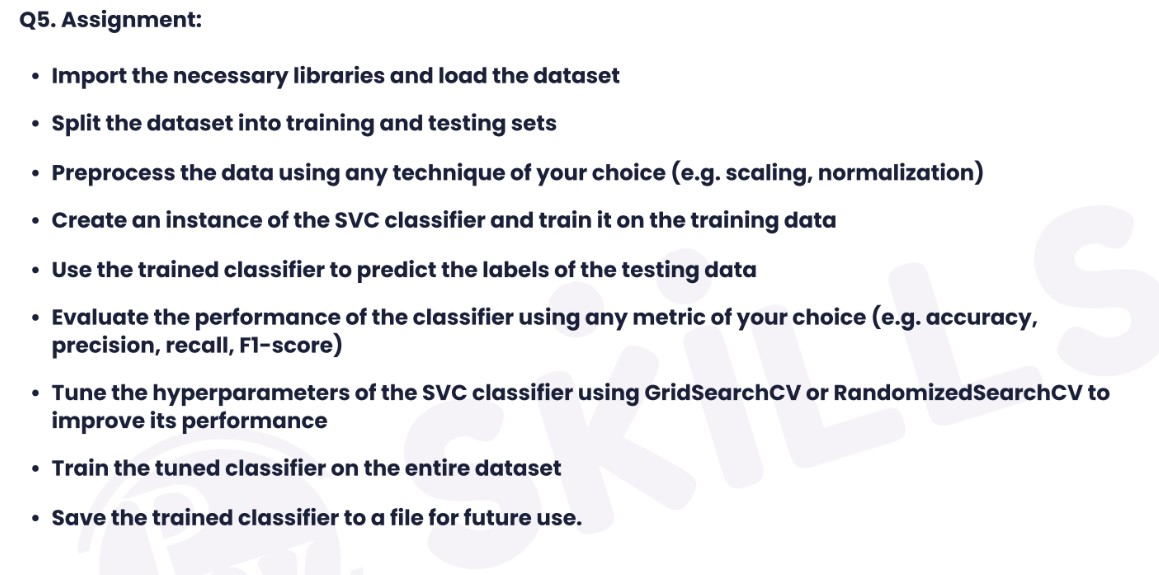

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
df=sns.load_dataset("penguins")
df
                    

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
df_copy=pd.DataFrame(df[['bill_length_mm',"bill_depth_mm","flipper_length_mm","body_mass_g",'sex']])

In [9]:
df_copy.shape

(344, 5)

In [10]:
df_copy.dropna()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
4,36.7,19.3,193.0,3450.0,Female
5,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Female
340,46.8,14.3,215.0,4850.0,Female
341,50.4,15.7,222.0,5750.0,Male
342,45.2,14.8,212.0,5200.0,Female


In [11]:
df_copy['sex']=df_copy['sex'].replace('Male',1)
df_copy['sex']=df_copy['sex'].replace('Female',0)

In [12]:
df_copy.isnull

<bound method DataFrame.isnull of      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1           18.7              181.0       3750.0  1.0
1              39.5           17.4              186.0       3800.0  0.0
2              40.3           18.0              195.0       3250.0  0.0
3               NaN            NaN                NaN          NaN  NaN
4              36.7           19.3              193.0       3450.0  0.0
..              ...            ...                ...          ...  ...
339             NaN            NaN                NaN          NaN  NaN
340            46.8           14.3              215.0       4850.0  0.0
341            50.4           15.7              222.0       5750.0  1.0
342            45.2           14.8              212.0       5200.0  0.0
343            49.9           16.1              213.0       5400.0  1.0

[344 rows x 5 columns]>

In [13]:
df_copy=df_copy.dropna()

In [14]:
df_copy.shape

(333, 5)

In [15]:
X=df_copy.iloc[:,:-1]

In [16]:
y=df_copy.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
from sklearn.svm import SVC

In [21]:
svc=SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score

In [23]:
print('accuracy_score ',accuracy_score(y_test,y_pred))
print('precision_score ',precision_score(y_test,y_pred))
print('classification_report ')
print(classification_report(y_test,y_pred))

accuracy_score  0.8809523809523809
precision_score  0.8372093023255814
classification_report 
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88        45
         1.0       0.84      0.92      0.88        39

    accuracy                           0.88        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.89      0.88      0.88        84



In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [26]:
grid=GridSearchCV(estimator=svc, param_grid=param_grid,refit=True,cv=5,verbose=3)

In [27]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.880 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [29]:
y_pred_grid=grid.predict(X_test_scaled)

In [30]:
print(accuracy_score(y_test,y_pred_grid))

0.8809523809523809


In [32]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(grid,open('grid_search.pkl','wb'))